<a href="https://colab.research.google.com/github/tzoung-yu/TrueVolume/blob/main/TrueVolume%E4%B8%8A%E5%B8%82%E4%B8%8A%E6%AB%83_%E4%BF%9D%E5%AE%88%E5%9E%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

統計起始日:2023/01
2324 仁寶 上市 電腦及週邊設備業
保守型 多空量能線
score:-161


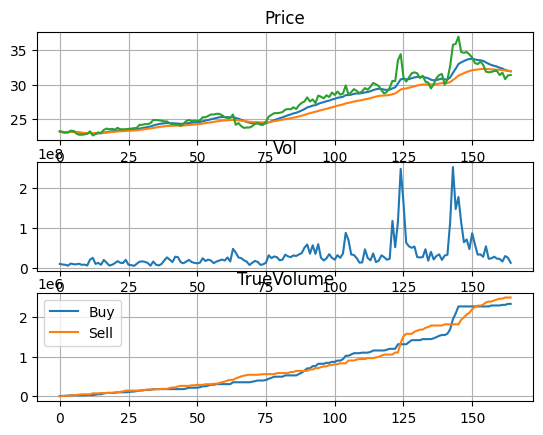

In [ ]:
!pip install twstock
#!twstock -U
import twstock
from twstock import Stock
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from google.colab import files
#src = list(files.upload().values())[0]
#open('ModuleTrueVol.py','wb').write(src)
from ModuleTrueVolKeep import TrueVol

#股票號碼
stoid="2324"

thisday = datetime.today()
#day_start = thisday - timedelta(days=365)
day_start = thisday.replace(month=1, day=1)

print("統計起始日:"+day_start.strftime("%Y/%m"))

codes = twstock.codes
df = pd.DataFrame.from_dict(codes, orient='index')

stoname=str(stoid)
if not stoname.isdigit():
  nn=df[df['name']==stoname]
  stoid=str(int(nn.code.iloc[0]))

nn=df[df["code"]==stoid]
print(stoid, nn.name[0], nn.market[0],nn.group[0])

print("保守型 多空量能線")

# 讀取股價資料
stock = Stock(stoid)                              # 擷取股價
sto_price = stock.fetch_from(day_start.year, day_start.month)
sto_attr = ['Date', 'Volume', 'Turnover', 'Open', 'High', 'Low', 'Close', 'Change', 'Transaction']
data1 = pd.DataFrame(columns = sto_attr, data = sto_price)
data1 = data1.drop(['Turnover', 'Change', 'Transaction'], axis=1)

TrueVol(data1)